In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame as DF
from sympy import diff
from sympy.abc import x,y
from sympy import cos
from sympy import *
from sympy import lambdify
from itertools import product
import random
from scipy.linalg import norm

**Define path.**

In [3]:
# Defining path to folder raw data is saved in
path = "C:/Users/robtk/OneDrive/Desktop/DIAS Internship/Raw data/Harmonic oscillator warm up/"

### Set display of pandas dataframes and Series to 11 decimal places

In [4]:
pd.set_option("display.precision", 11)

**Read in the outputs for 2 2x2 matrices**

In [5]:
X2_by_2 = pd.read_pickle(path+"X.pkl")
V2_by_2 = pd.read_pickle(path+"V.pkl")

X2 = pd.read_pickle(path+"Xb.pkl")
V2 = pd.read_pickle(path+"Vb.pkl")

X_test = pd.read_pickle(path+"X_test10.pkl")
V_test = pd.read_pickle(path+"V_test10.pkl")

X_test = pd.read_pickle(path+"X_test10.pkl")
V_test = pd.read_pickle(path+"V_test10.pkl")


In [6]:
A_list3 = pd.read_csv(path + "A_vector_initial.txt", sep = ";",
                        names = ["A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8", "A9"],
                      index_col=False)

In [7]:
X_list3 = pd.read_csv(path + "X_vector_initial.txt", sep = "\s+;,",
                      names = ["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8", "X9"],
                      index_col=False)
X_list3["X1"][0]

<ipython-input-7-9f5b6aa4e332>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  X_list3 = pd.read_csv(path + "X_vector_initial.txt", sep = "\s+;,",


'0.004140886653359  0.002255679494230  0.025393301532669'

In [8]:
X3_DF.to_pickle(path+"X1_simulation_3.txt")
X4_DF.to_pickle(path+"X2_simulation_3.txt")


NameError: name 'X3_DF' is not defined

In [139]:
X3_DF = pd.read_pickle(path+"X1_simulation_3.txt")
X4_DF = pd.read_pickle(path+"X2_simulation_3.txt")


In [107]:
#### Load in each line in the text file
X_list3 = pd.read_csv(path + "X_original_sim3.txt",
                        names = ["X1"],
                      index_col=False)

# Split each line into a list in a list
data = []
for line in X_list3["X1"]:
    items = line.rstrip('\n').split(" ")
    data.append(items)
i = 0
while i < len(data):
    
    data[i] = list(filter(None, data[i]))
    i += 1

# Turn each element into a float
data_array = np.array(data, dtype=np.float32)    
    
# Turn every 2 lists into a single matrix by enclosing them in another list inside the array.
X_values = data_array.reshape(-1, 2, data_array.shape[1])

# X_values is a list of all X matrices recorded, it has the initial recordings of X1-X9 and then the 2nd recordings of X1-X9 etc.
# We need to break up every ninth element of X_values into new arrays as follows

X_matrices = [None] * 9  # List to store the nine new arrays

for i in range(9):
    X_matrices[i] = X_values[i::9] # i::9 starts at the ith element and goes up in steps of 9 until the we get out of index of the array.

# X_matrices is now a list of 9 arrays, each holding the time evolutions of X1-X9 respectively.

# Put each array into a column of a dataframe
labels = ["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8", "X9"]

delta_t = 5*10**-4
record_steps = 1000
seconds_simulated = 200
simulation_repetitions = seconds_simulated / delta_t

times = np.arange(0, simulation_repetitions*delta_t + delta_t*record_steps, delta_t*record_steps)

X5_DF = pd.DataFrame({"X1" : X_matrices[0].tolist(), "X2" : X_matrices[1].tolist(), "X3" : X_matrices[2].tolist(), "X4" : X_matrices[3].tolist(), "X5" : X_matrices[4].tolist(),
                     "X6" : X_matrices[5].tolist(), "X7" : X_matrices[6].tolist(), "X8" : X_matrices[7].tolist(), "X9" : X_matrices[8].tolist()}, index = times,
                    columns = labels)


In [16]:
X3_DF

NameError: name 'X3_DF' is not defined

In [120]:
# Load in each line in the text file
V_list3 = pd.read_csv(path + "V_original_sim3.txt",
                        names = ["V1"],
                      index_col=False)

# Split each line into a list in a list
data = []
for line in V_list3["V1"]:
    items = line.rstrip('\n').split(" ")
    data.append(items)
i = 0
while i < len(data):
    
    data[i] = list(filter(None, data[i]))
    i += 1

# Turn each element into a float
data_array = np.array(data, dtype=np.float32)    
    
# Turn every 2 lists into a single matrix by enclosing them in another list inside the array.
V_values = data_array.reshape(-1, 2, data_array.shape[1])

# V_values is a list of all V matrices recorded, it has the initial matrices of V1-V9 and then the 2nd recordings of V1-V9 etc.
# We need to break up every ninth element of V_values into new arrays as follows

V_matrices = [None] * 9  # List to store the nine new arrays

for i in range(9):
    V_matrices[i] = V_values[i::9] # i::9 starts at the ith element and goes up in steps of 9 until the we get out of index of the array.

# X_matrices is now a list of 9 arrays, each holding the time evolutions of X1-X9 respectively.
#print(V_matrices)
# Put each array into a column of a dataframe
labels = ["V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9"]

delta_t = 1*10**-5
record_steps = 1000
seconds_simulated = 100
simulation_repetitions = seconds_simulated / delta_t

times = np.arange(delta_t*record_steps, simulation_repetitions*delta_t + delta_t*record_steps, delta_t*record_steps)

V9_DF = pd.DataFrame({"V1" : V_matrices[0].tolist(), "V2" : V_matrices[1].tolist(), "V3" : V_matrices[2].tolist(), "V4" : V_matrices[3].tolist(), "V5" : V_matrices[4].tolist(),
                     "V6" : V_matrices[5].tolist(), "V7" : V_matrices[6].tolist(), "V8" : V_matrices[7].tolist(), "V9" : V_matrices[8].tolist()}, index = times,
                    columns = labels)


**Check that the Gauss' law constraint is conserved.**

In [344]:
# Define the commutator
def commutator(A,B):
    
    # matmul() multiplies two matrices together
    return np.matmul(A,B) - np.matmul(B,A)

## Are Xi still traceless

## Gauss' Law test

In [446]:
i = 0
while i < len(X2_DF.iloc[:,0]):
    
    # Computes the sum of the commutators of Xi and Vi and if they equal zero move on to the next one.
    XXX = X1_DF
    VVV = V1_DF
    Gauss = (commutator(np.array(XXX.iloc[i,0]), np.array(VVV.iloc[i,0])) + 
             commutator(np.array(XXX.iloc[i,1]), np.array(VVV.iloc[i,1])) +
             commutator(np.array(XXX.iloc[i,2]), np.array(VVV.iloc[i,2])) + 
             commutator(np.array(XXX.iloc[i,3]), np.array(VVV.iloc[i,3])) +
             commutator(np.array(XXX.iloc[i,4]), np.array(VVV.iloc[i,4])) + 
             commutator(np.array(XXX.iloc[i,5]), np.array(VVV.iloc[i,5])) + 
             commutator(np.array(XXX.iloc[i,6]), np.array(VVV.iloc[i,6])) + 
             commutator(np.array(XXX.iloc[i,7]), np.array(VVV.iloc[i,7])) + 
             commutator(np.array(XXX.iloc[i,8]), np.array(VVV.iloc[i,8])) )

             
             
    i+=1
    print(i)
    # Check if the answer equals the zero matrix.
    if np.all(np.isclose(Gauss, 0)) != True:
        
    # If the sum is printed then the commutator does not equal the zero matrix stop the loop and print what the answer is.
        print(Gauss)
        
    print(Gauss)

1
[[ 0.00000000e+00 -1.29698495e-05]
 [ 1.29698495e-05  0.00000000e+00]]
[[ 0.00000000e+00 -1.29698495e-05]
 [ 1.29698495e-05  0.00000000e+00]]
2
[[ 0.00000000e+00 -2.02183181e-06]
 [ 2.02183181e-06  0.00000000e+00]]
[[ 0.00000000e+00 -2.02183181e-06]
 [ 2.02183181e-06  0.00000000e+00]]
3
[[ 0.00000000e+00 -5.54763438e-05]
 [ 5.54763438e-05  0.00000000e+00]]
[[ 0.00000000e+00 -5.54763438e-05]
 [ 5.54763438e-05  0.00000000e+00]]
4
[[ 0.00000000e+00  3.69026651e-06]
 [-3.69026651e-06  0.00000000e+00]]
[[ 0.00000000e+00  3.69026651e-06]
 [-3.69026651e-06  0.00000000e+00]]
5
[[ 0.00000000e+00  1.31952077e-05]
 [-1.31952077e-05  0.00000000e+00]]
[[ 0.00000000e+00  1.31952077e-05]
 [-1.31952077e-05  0.00000000e+00]]
6
[[ 0.00000000e+00 -2.60374254e-05]
 [ 2.60374254e-05  0.00000000e+00]]
[[ 0.00000000e+00 -2.60374254e-05]
 [ 2.60374254e-05  0.00000000e+00]]
7
[[ 0.00000000e+00  4.46263604e-06]
 [-4.46263604e-06  0.00000000e+00]]
[[ 0.00000000e+00  4.46263604e-06]
 [-4.46263604e-06  0.0000000

81
[[ 0.00000000e+00 -7.15901119e-06]
 [ 7.15901119e-06  0.00000000e+00]]
[[ 0.00000000e+00 -7.15901119e-06]
 [ 7.15901119e-06  0.00000000e+00]]
82
[[ 0.00000000e+00 -1.33258305e-06]
 [ 1.33258305e-06  0.00000000e+00]]
[[ 0.00000000e+00 -1.33258305e-06]
 [ 1.33258305e-06  0.00000000e+00]]
83
[[ 0.00000000e+00 -7.88367404e-06]
 [ 7.88367404e-06  0.00000000e+00]]
[[ 0.00000000e+00 -7.88367404e-06]
 [ 7.88367404e-06  0.00000000e+00]]
84
[[ 0.00000000e+00  4.58974415e-06]
 [-4.58974415e-06  0.00000000e+00]]
[[ 0.00000000e+00  4.58974415e-06]
 [-4.58974415e-06  0.00000000e+00]]
85
[[ 0.00000000e+00  4.21209158e-06]
 [-4.21209158e-06  0.00000000e+00]]
[[ 0.00000000e+00  4.21209158e-06]
 [-4.21209158e-06  0.00000000e+00]]
86
[[ 0.00000000e+00  1.05617941e-05]
 [-1.05617941e-05  0.00000000e+00]]
[[ 0.00000000e+00  1.05617941e-05]
 [-1.05617941e-05  0.00000000e+00]]
87
[[ 0.0000000e+00 -6.2558737e-06]
 [ 6.2558737e-06  0.0000000e+00]]
[[ 0.0000000e+00 -6.2558737e-06]
 [ 6.2558737e-06  0.0000000

148
[[ 0.00000000e+00  9.07301813e-06]
 [-9.07301813e-06  0.00000000e+00]]
[[ 0.00000000e+00  9.07301813e-06]
 [-9.07301813e-06  0.00000000e+00]]
149
[[ 0.00000000e+00 -3.19506578e-06]
 [ 3.19506578e-06  0.00000000e+00]]
[[ 0.00000000e+00 -3.19506578e-06]
 [ 3.19506578e-06  0.00000000e+00]]
150
[[ 0.0000000e+00 -5.3206283e-06]
 [ 5.3206283e-06  0.0000000e+00]]
[[ 0.0000000e+00 -5.3206283e-06]
 [ 5.3206283e-06  0.0000000e+00]]
151
[[ 0.00000000e+00 -3.58523894e-06]
 [ 3.58523894e-06  0.00000000e+00]]
[[ 0.00000000e+00 -3.58523894e-06]
 [ 3.58523894e-06  0.00000000e+00]]
152
[[ 0.00000000e+00  5.21645759e-06]
 [-5.21645759e-06  0.00000000e+00]]
[[ 0.00000000e+00  5.21645759e-06]
 [-5.21645759e-06  0.00000000e+00]]
153
[[ 0.00000000e+00  2.43563585e-06]
 [-2.43563585e-06  0.00000000e+00]]
[[ 0.00000000e+00  2.43563585e-06]
 [-2.43563585e-06  0.00000000e+00]]
154
[[ 0.0000000e+00  8.8104315e-08]
 [-8.8104315e-08  0.0000000e+00]]
[[ 0.0000000e+00  8.8104315e-08]
 [-8.8104315e-08  0.0000000e

225
[[ 0.00000000e+00  1.22605119e-06]
 [-1.22605119e-06  0.00000000e+00]]
[[ 0.00000000e+00  1.22605119e-06]
 [-1.22605119e-06  0.00000000e+00]]
226
[[ 0.00000000e+00  1.29586388e-06]
 [-1.29586388e-06  0.00000000e+00]]
[[ 0.00000000e+00  1.29586388e-06]
 [-1.29586388e-06  0.00000000e+00]]
227
[[ 0.00000000e+00 -6.34459491e-07]
 [ 6.34459491e-07  0.00000000e+00]]
[[ 0.00000000e+00 -6.34459491e-07]
 [ 6.34459491e-07  0.00000000e+00]]
228
[[ 0.0000000e+00 -5.1653652e-07]
 [ 5.1653652e-07  0.0000000e+00]]
[[ 0.0000000e+00 -5.1653652e-07]
 [ 5.1653652e-07  0.0000000e+00]]
229
[[ 0.00000000e+00  3.12246577e-07]
 [-3.12246577e-07  0.00000000e+00]]
[[ 0.00000000e+00  3.12246577e-07]
 [-3.12246577e-07  0.00000000e+00]]
230
[[ 0.00000000e+00  1.42609217e-06]
 [-1.42609217e-06  0.00000000e+00]]
[[ 0.00000000e+00  1.42609217e-06]
 [-1.42609217e-06  0.00000000e+00]]
231
[[ 0.00000000e+00  1.00865388e-06]
 [-1.00865388e-06  0.00000000e+00]]
[[ 0.00000000e+00  1.00865388e-06]
 [-1.00865388e-06  0.0

294
[[ 0.0000000e+00  1.6094211e-06]
 [-1.6094211e-06  0.0000000e+00]]
[[ 0.0000000e+00  1.6094211e-06]
 [-1.6094211e-06  0.0000000e+00]]
295
[[ 0.00000000e+00  7.54883052e-07]
 [-7.54883052e-07  0.00000000e+00]]
[[ 0.00000000e+00  7.54883052e-07]
 [-7.54883052e-07  0.00000000e+00]]
296
[[ 0.00000000e+00  5.89992872e-07]
 [-5.89992872e-07  0.00000000e+00]]
[[ 0.00000000e+00  5.89992872e-07]
 [-5.89992872e-07  0.00000000e+00]]
297
[[ 0.00000000e+00  4.61627522e-07]
 [-4.61627522e-07  0.00000000e+00]]
[[ 0.00000000e+00  4.61627522e-07]
 [-4.61627522e-07  0.00000000e+00]]
298
[[ 0.00000000e+00  1.38493626e-06]
 [-1.38493626e-06  0.00000000e+00]]
[[ 0.00000000e+00  1.38493626e-06]
 [-1.38493626e-06  0.00000000e+00]]
299
[[ 0.00000000e+00 -3.05050524e-06]
 [ 3.05050524e-06  0.00000000e+00]]
[[ 0.00000000e+00 -3.05050524e-06]
 [ 3.05050524e-06  0.00000000e+00]]
300
[[ 0.00000000e+00 -1.12259742e-06]
 [ 1.12259742e-06  0.00000000e+00]]
[[ 0.00000000e+00 -1.12259742e-06]
 [ 1.12259742e-06  0.0

370
[[ 0.00000000e+00 -8.14650001e-07]
 [ 8.14650001e-07  0.00000000e+00]]
[[ 0.00000000e+00 -8.14650001e-07]
 [ 8.14650001e-07  0.00000000e+00]]
371
[[ 0.00000000e+00  9.60512758e-09]
 [-9.60512758e-09  0.00000000e+00]]
372
[[ 0.00000000e+00 -2.05317848e-06]
 [ 2.05317848e-06  0.00000000e+00]]
[[ 0.00000000e+00 -2.05317848e-06]
 [ 2.05317848e-06  0.00000000e+00]]
373
[[ 0.00000000e+00 -4.82485799e-07]
 [ 4.82485799e-07  0.00000000e+00]]
[[ 0.00000000e+00 -4.82485799e-07]
 [ 4.82485799e-07  0.00000000e+00]]
374
[[ 0.00000000e+00  3.10828586e-07]
 [-3.10828586e-07  0.00000000e+00]]
[[ 0.00000000e+00  3.10828586e-07]
 [-3.10828586e-07  0.00000000e+00]]
375
[[ 0.00000000e+00 -1.03797589e-06]
 [ 1.03797589e-06  0.00000000e+00]]
[[ 0.00000000e+00 -1.03797589e-06]
 [ 1.03797589e-06  0.00000000e+00]]
376
[[ 0.00000000e+00 -4.54917007e-07]
 [ 4.54917007e-07  0.00000000e+00]]
[[ 0.00000000e+00 -4.54917007e-07]
 [ 4.54917007e-07  0.00000000e+00]]
377
[[ 0.00000000e+00 -9.05090622e-07]
 [ 9.05090

432
[[ 0.00000000e+00 -2.70054004e-07]
 [ 2.70054004e-07  0.00000000e+00]]
[[ 0.00000000e+00 -2.70054004e-07]
 [ 2.70054004e-07  0.00000000e+00]]
433
[[ 0.00000000e+00 -1.80479568e-06]
 [ 1.80479568e-06  0.00000000e+00]]
[[ 0.00000000e+00 -1.80479568e-06]
 [ 1.80479568e-06  0.00000000e+00]]
434
[[ 0.0000000e+00 -4.6629786e-06]
 [ 4.6629786e-06  0.0000000e+00]]
[[ 0.0000000e+00 -4.6629786e-06]
 [ 4.6629786e-06  0.0000000e+00]]
435
[[ 0.00000000e+00 -8.64447934e-07]
 [ 8.64447934e-07  0.00000000e+00]]
[[ 0.00000000e+00 -8.64447934e-07]
 [ 8.64447934e-07  0.00000000e+00]]
436
[[ 0.00000000e+00 -1.11553413e-06]
 [ 1.11553413e-06  0.00000000e+00]]
[[ 0.00000000e+00 -1.11553413e-06]
 [ 1.11553413e-06  0.00000000e+00]]
437
[[ 0.00000000e+00 -8.47088172e-07]
 [ 8.47088172e-07  0.00000000e+00]]
[[ 0.00000000e+00 -8.47088172e-07]
 [ 8.47088172e-07  0.00000000e+00]]
438
[[ 0.00000000e+00 -6.48820939e-06]
 [ 6.48820939e-06  0.00000000e+00]]
[[ 0.00000000e+00 -6.48820939e-06]
 [ 6.48820939e-06  0.0

 [ 8.41248608e-07  0.00000000e+00]]
[[ 0.00000000e+00 -8.41248608e-07]
 [ 8.41248608e-07  0.00000000e+00]]
503
[[ 0.00000000e+00 -8.63209499e-07]
 [ 8.63209499e-07  0.00000000e+00]]
[[ 0.00000000e+00 -8.63209499e-07]
 [ 8.63209499e-07  0.00000000e+00]]
504
[[ 0.00000000e+00 -1.06248126e-06]
 [ 1.06248126e-06  0.00000000e+00]]
[[ 0.00000000e+00 -1.06248126e-06]
 [ 1.06248126e-06  0.00000000e+00]]
505
[[ 0.00000000e+00  3.23276877e-06]
 [-3.23276877e-06  0.00000000e+00]]
[[ 0.00000000e+00  3.23276877e-06]
 [-3.23276877e-06  0.00000000e+00]]
506
[[ 0.00000000e+00  1.71066754e-06]
 [-1.71066754e-06  0.00000000e+00]]
[[ 0.00000000e+00  1.71066754e-06]
 [-1.71066754e-06  0.00000000e+00]]
507
[[ 0.00000000e+00 -2.06180458e-06]
 [ 2.06180458e-06  0.00000000e+00]]
[[ 0.00000000e+00 -2.06180458e-06]
 [ 2.06180458e-06  0.00000000e+00]]
508
[[ 0.00000000e+00  3.70508038e-06]
 [-3.70508038e-06  0.00000000e+00]]
[[ 0.00000000e+00  3.70508038e-06]
 [-3.70508038e-06  0.00000000e+00]]
509
[[ 0.00000000

579
[[ 0.00000000e+00 -1.14139405e-06]
 [ 1.14139405e-06  0.00000000e+00]]
[[ 0.00000000e+00 -1.14139405e-06]
 [ 1.14139405e-06  0.00000000e+00]]
580
[[ 0.00000000e+00 -1.46159375e-06]
 [ 1.46159375e-06  0.00000000e+00]]
[[ 0.00000000e+00 -1.46159375e-06]
 [ 1.46159375e-06  0.00000000e+00]]
581
[[ 0.00000000e+00  9.16363945e-08]
 [-9.16363945e-08  0.00000000e+00]]
[[ 0.00000000e+00  9.16363945e-08]
 [-9.16363945e-08  0.00000000e+00]]
582
[[ 0.00000000e+00 -6.23482184e-07]
 [ 6.23482184e-07  0.00000000e+00]]
[[ 0.00000000e+00 -6.23482184e-07]
 [ 6.23482184e-07  0.00000000e+00]]
583
[[ 0.00000000e+00 -2.60727397e-07]
 [ 2.60727397e-07  0.00000000e+00]]
[[ 0.00000000e+00 -2.60727397e-07]
 [ 2.60727397e-07  0.00000000e+00]]
584
[[ 0.00000000e+00  5.10022018e-07]
 [-5.10022018e-07  0.00000000e+00]]
[[ 0.00000000e+00  5.10022018e-07]
 [-5.10022018e-07  0.00000000e+00]]
585
[[ 0.00000000e+00 -9.76435796e-07]
 [ 9.76435796e-07  0.00000000e+00]]
[[ 0.00000000e+00 -9.76435796e-07]
 [ 9.76435796e

 [-7.55615259e-09  0.00000000e+00]]
657
[[ 0.0000000e+00 -5.5924037e-08]
 [ 5.5924037e-08  0.0000000e+00]]
[[ 0.0000000e+00 -5.5924037e-08]
 [ 5.5924037e-08  0.0000000e+00]]
658
[[ 0.00000000e+00  2.36099787e-07]
 [-2.36099787e-07  0.00000000e+00]]
[[ 0.00000000e+00  2.36099787e-07]
 [-2.36099787e-07  0.00000000e+00]]
659
[[ 0.00000000e+00 -7.88011725e-07]
 [ 7.88011725e-07  0.00000000e+00]]
[[ 0.00000000e+00 -7.88011725e-07]
 [ 7.88011725e-07  0.00000000e+00]]
660
[[ 0.0000000e+00  6.8777492e-07]
 [-6.8777492e-07  0.0000000e+00]]
[[ 0.0000000e+00  6.8777492e-07]
 [-6.8777492e-07  0.0000000e+00]]
661
[[ 0.00000000e+00  4.69480618e-07]
 [-4.69480618e-07  0.00000000e+00]]
[[ 0.00000000e+00  4.69480618e-07]
 [-4.69480618e-07  0.00000000e+00]]
662
[[ 0.00000000e+00  1.59620477e-07]
 [-1.59620477e-07  0.00000000e+00]]
[[ 0.00000000e+00  1.59620477e-07]
 [-1.59620477e-07  0.00000000e+00]]
663
[[ 0.00000000e+00 -5.00211474e-07]
 [ 5.00211474e-07  0.00000000e+00]]
[[ 0.00000000e+00 -5.00211474

751
[[ 0.00000000e+00 -1.74485021e-07]
 [ 1.74485021e-07  0.00000000e+00]]
[[ 0.00000000e+00 -1.74485021e-07]
 [ 1.74485021e-07  0.00000000e+00]]
752
[[ 0.00000000e+00 -1.03653388e-08]
 [ 1.03653388e-08  0.00000000e+00]]
[[ 0.00000000e+00 -1.03653388e-08]
 [ 1.03653388e-08  0.00000000e+00]]
753
[[ 0.00000000e+00  2.21455637e-07]
 [-2.21455637e-07  0.00000000e+00]]
[[ 0.00000000e+00  2.21455637e-07]
 [-2.21455637e-07  0.00000000e+00]]
754
[[ 0.00000000e+00  1.16005858e-06]
 [-1.16005858e-06  0.00000000e+00]]
[[ 0.00000000e+00  1.16005858e-06]
 [-1.16005858e-06  0.00000000e+00]]
755
[[ 0.00000000e+00 -5.22068277e-07]
 [ 5.22068277e-07  0.00000000e+00]]
[[ 0.00000000e+00 -5.22068277e-07]
 [ 5.22068277e-07  0.00000000e+00]]
756
[[ 0.00000000e+00  1.68600657e-06]
 [-1.68600657e-06  0.00000000e+00]]
[[ 0.00000000e+00  1.68600657e-06]
 [-1.68600657e-06  0.00000000e+00]]
757
[[ 0.00000000e+00 -7.61415254e-07]
 [ 7.61415254e-07  0.00000000e+00]]
[[ 0.00000000e+00 -7.61415254e-07]
 [ 7.61415254e

811
[[ 0.00000000e+00 -4.33111025e-06]
 [ 4.33111025e-06  0.00000000e+00]]
[[ 0.00000000e+00 -4.33111025e-06]
 [ 4.33111025e-06  0.00000000e+00]]
812
[[ 0.000000e+00  3.470798e-06]
 [-3.470798e-06  0.000000e+00]]
[[ 0.000000e+00  3.470798e-06]
 [-3.470798e-06  0.000000e+00]]
813
[[ 0.00000000e+00 -1.90767494e-07]
 [ 1.90767494e-07  0.00000000e+00]]
[[ 0.00000000e+00 -1.90767494e-07]
 [ 1.90767494e-07  0.00000000e+00]]
814
[[ 0.00000000e+00  4.60649667e-06]
 [-4.60649667e-06  0.00000000e+00]]
[[ 0.00000000e+00  4.60649667e-06]
 [-4.60649667e-06  0.00000000e+00]]
815
[[ 0.00000000e+00  8.73816953e-07]
 [-8.73816953e-07  0.00000000e+00]]
[[ 0.00000000e+00  8.73816953e-07]
 [-8.73816953e-07  0.00000000e+00]]
816
[[ 0.00000000e+00 -1.63617247e-06]
 [ 1.63617247e-06  0.00000000e+00]]
[[ 0.00000000e+00 -1.63617247e-06]
 [ 1.63617247e-06  0.00000000e+00]]
817
[[ 0.00000000e+00 -1.81360662e-06]
 [ 1.81360662e-06  0.00000000e+00]]
[[ 0.00000000e+00 -1.81360662e-06]
 [ 1.81360662e-06  0.00000000e

917
[[ 0.0000000e+00 -5.5725701e-07]
 [ 5.5725701e-07  0.0000000e+00]]
[[ 0.0000000e+00 -5.5725701e-07]
 [ 5.5725701e-07  0.0000000e+00]]
918
[[ 0.00000000e+00 -2.62655185e-07]
 [ 2.62655185e-07  0.00000000e+00]]
[[ 0.00000000e+00 -2.62655185e-07]
 [ 2.62655185e-07  0.00000000e+00]]
919
[[ 0.0000000e+00  3.0764963e-06]
 [-3.0764963e-06  0.0000000e+00]]
[[ 0.0000000e+00  3.0764963e-06]
 [-3.0764963e-06  0.0000000e+00]]
920
[[ 0.0000000e+00 -9.6903092e-06]
 [ 9.6903092e-06  0.0000000e+00]]
[[ 0.0000000e+00 -9.6903092e-06]
 [ 9.6903092e-06  0.0000000e+00]]
921
[[ 0.00000000e+00  4.63994748e-06]
 [-4.63994748e-06  0.00000000e+00]]
[[ 0.00000000e+00  4.63994748e-06]
 [-4.63994748e-06  0.00000000e+00]]
922
[[ 0.0000000e+00 -1.0138055e-07]
 [ 1.0138055e-07  0.0000000e+00]]
[[ 0.0000000e+00 -1.0138055e-07]
 [ 1.0138055e-07  0.0000000e+00]]
923
[[ 0.00000000e+00  9.44883517e-07]
 [-9.44883517e-07  0.00000000e+00]]
[[ 0.00000000e+00  9.44883517e-07]
 [-9.44883517e-07  0.00000000e+00]]
924
[[ 0.0

989
[[ 0.00000000e+00 -3.07519832e-07]
 [ 3.07519832e-07  0.00000000e+00]]
[[ 0.00000000e+00 -3.07519832e-07]
 [ 3.07519832e-07  0.00000000e+00]]
990
[[ 0.0000000e+00 -2.1911835e-06]
 [ 2.1911835e-06  0.0000000e+00]]
[[ 0.0000000e+00 -2.1911835e-06]
 [ 2.1911835e-06  0.0000000e+00]]
991
[[ 0.00000000e+00 -4.04311788e-06]
 [ 4.04311788e-06  0.00000000e+00]]
[[ 0.00000000e+00 -4.04311788e-06]
 [ 4.04311788e-06  0.00000000e+00]]
992
[[ 0.00000000e+00 -6.64647573e-08]
 [ 6.64647573e-08  0.00000000e+00]]
[[ 0.00000000e+00 -6.64647573e-08]
 [ 6.64647573e-08  0.00000000e+00]]
993
[[ 0.00000000e+00  1.45797036e-06]
 [-1.45797036e-06  0.00000000e+00]]
[[ 0.00000000e+00  1.45797036e-06]
 [-1.45797036e-06  0.00000000e+00]]
994
[[ 0.0000000e+00  4.1554236e-07]
 [-4.1554236e-07  0.0000000e+00]]
[[ 0.0000000e+00  4.1554236e-07]
 [-4.1554236e-07  0.0000000e+00]]
995
[[ 0.00000000e+00 -3.26599567e-06]
 [ 3.26599567e-06  0.00000000e+00]]
[[ 0.00000000e+00 -3.26599567e-06]
 [ 3.26599567e-06  0.00000000e

**From the above code it is clear that Gauss' law is conserved throughout the simulation.**

**Now check if the Hamiltonian is conserved.**


In [447]:
# Define the Lagrangian

def L(X_list, V_list, g):
    
    term_1 = np.trace(np.array(V_list[0]) * np.array(V_list[0]) + np.array(V_list[1]) * np.array(V_list[1]) +
                      np.array(V_list[2]) * np.array(V_list[2]) + np.array(V_list[3]) * np.array(V_list[3]) +
                      np.array(V_list[4]) * np.array(V_list[4]) + np.array(V_list[5]) * np.array(V_list[5]) +
                      np.array(V_list[6]) * np.array(V_list[6]) + np.array(V_list[7]) * np.array(V_list[7]) +
                      np.array(V_list[8]) * np.array(V_list[8]))
    
    # Calculate the sum of commutators found in the second term of the lagrangian
    Sum2 = 0
    for matrix in X_list:
        el = np.array(matrix)
        Sum2 += np.trace( (commutator(el,np.array(X_list[0])))**2 + (commutator(el,np.array(X_list[1])))**2 + 
                          (commutator(el,np.array(X_list[2])))**2 + (commutator(el,np.array(X_list[3])))**2 + 
                          (commutator(el,np.array(X_list[4])))**2 + (commutator(el,np.array(X_list[5])))**2 + 
                          (commutator(el,np.array(X_list[6])))**2 + (commutator(el,np.array(X_list[7])))**2 + 
                          (commutator(el,np.array(X_list[8])))**2)  
    
    term_2 = 1/2 * Sum2
    
    return 1/(2*g**2) * (term_1 + term_2)

# Define the Hamiltonian

def H(X_list, V_list, g):
    
    
    term_1 = np.trace(np.array(V_list[0]) * np.array(V_list[0]) + np.array(V_list[1]) * np.array(V_list[1]) +
                      np.array(V_list[2]) * np.array(V_list[2]) + np.array(V_list[3]) * np.array(V_list[3]) +
                      np.array(V_list[4]) * np.array(V_list[4]) + np.array(V_list[5]) * np.array(V_list[5]) +
                      np.array(V_list[6]) * np.array(V_list[6]) + np.array(V_list[7]) * np.array(V_list[7]) +
                      np.array(V_list[8]) * np.array(V_list[8]))
    
    # Calculate the sum of commutators found in the second term of the lagrangian
    Sum2 = 0
    for matrix in X_list:
        el = np.array(matrix)
        Sum2 += np.trace( (commutator(el,np.array(X_list[0])))**2 + (commutator(el,np.array(X_list[1])))**2 + 
                          (commutator(el,np.array(X_list[2])))**2 + (commutator(el,np.array(X_list[3])))**2 + 
                          (commutator(el,np.array(X_list[4])))**2 + (commutator(el,np.array(X_list[5])))**2 + 
                          (commutator(el,np.array(X_list[6])))**2 + (commutator(el,np.array(X_list[7])))**2 + 
                          (commutator(el,np.array(X_list[8])))**2)  
    term_2 = 1/2 * Sum2
    
    return 1/(2*g**2) * (term_1 - term_2)
    

In [448]:
i = 0
while i < len(XXX["X1"].values):
    
    # Create a list of the 9 coordinate matrices for the position.
    X_list = [XXX["X1"].values[i], XXX["X2"].values[i], XXX["X3"].values[i], XXX["X4"].values[i], 
              XXX["X5"].values[i], XXX["X6"].values[i], XXX["X7"].values[i], XXX["X8"].values[i],
              XXX["X9"].values[i]]
    V_list = [VVV["V1"].values[i], VVV["V2"].values[i], VVV["V3"].values[i], VVV["V4"].values[i], 
              VVV["V5"].values[i], VVV["V6"].values[i], VVV["V7"].values[i], VVV["V8"].values[i],
             VVV["V9"].values[i]]
    #zero = [[0,0,0],[0,0,0],[0,0,0]]
    #V_list = [zero,zero, zero, zero, zero, zero, zero, zero, zero]

    
    print(H(X_list, V_list, 1))
    i += 1

59.57494075564042
9.92534578880137
87.73371437693532
22.68025436229649
46.56401249334709
83.4588217422393
19.011665172948508
32.58179970565543
84.40814604382501
73.18276488385203
31.2922449041746
12.939055898205545
21.620039194680146
38.33388952944939
50.48877927475486
54.65096379286062
50.627701525447385
38.74657326448362
22.927028812098527
17.02585015975573
40.16452932689677
80.67948040982121
74.33311873295102
22.119457984473065
53.00938059706624
78.95312238470898
20.27675617361746
86.24910447316321
22.46528078122585
86.75730468890205
24.666207680654505
68.10818201472152
72.8354947136272
25.774455797500025
44.30419563801329
79.37677537125775
85.2081594047236
74.20678749429632
64.79277818821706
63.39186070467006
70.38930855298008
81.96120982363459
84.04038209035377
58.58470949408813
30.91649614480529
63.730513025569714
77.35541399441057
33.19220021429191
84.90958908394187
34.379895331169976
84.01871001405539
47.02671105884765
48.788093022437536
83.0728553672356
74.04596104057501
52.31

79.31372558854981
77.36754272270105
77.46560104042248
80.30878743637123
70.48016563797401
64.90487517035126
80.63918765161358
55.34922190265503
78.14793700117593
65.75350996384643
46.321208667197894
69.68857978123101
84.225711840299
79.03475947017422
70.29606590416765
67.48811567051555
72.87474618219387
83.23767767038039
83.81937578602744
54.97204876214464
21.120787090731312
52.27321478757041
85.33160069432209
21.46861466607593
60.26477769409096
59.5375932467607
29.203463233977978
73.31679957175601
25.832915253082675
62.377623883372195
48.557081457428055
24.828009028900134
86.63338196285369
6.5407731806050915
58.70083352550572
72.90673020210095
1.5908612877676762
60.055422646450126
77.7957598253424
4.441567168317729
41.156848036344854
88.56715335680978
19.995569995599404
18.557854506214152
88.45169007680771
38.542542822483355
9.191967319810153
85.6368396021551
38.928656437567156
17.547854927981213
89.37875250937688
12.278770690532264
64.13645500921325
47.69378198070496
38.1433437265543

76.30036866657237
60.32242762282912
57.573523652148225
53.03461644230735
68.51718234496234
20.97279654210399
73.09275855404474
56.73464091864853
9.307440721700964
39.552839580942276
78.43717862284822
56.47207195227214
11.083740943487342
4.696574969839039
42.36430065696369
76.5954686827937
65.30244077486095
21.24136953261023
4.465133316157406
45.427098216953155
79.61219693417173


# Check conservation of angular momentum

**Angular momentum is $Tr(Xi\dot Xj - Xj\dot Xi)$**

In [449]:
def angular_momentum(XXX, VVV):
    
    i = 0
    while i < len(XXX["X1"].values):
        # Create a list of the 9 coordinate matrices for the position.
        X_list = [XXX["X1"].values[i], XXX["X2"].values[i], XXX["X3"].values[i], XXX["X4"].values[i], 
                  XXX["X5"].values[i], XXX["X6"].values[i], XXX["X7"].values[i], XXX["X8"].values[i],
                  XXX["X9"].values[i]]
        V_list = [VVV["V1"].values[i], VVV["V2"].values[i], VVV["V3"].values[i], VVV["V4"].values[i], 
                  VVV["V5"].values[i], VVV["V6"].values[i], VVV["V7"].values[i], VVV["V8"].values[i],
                  VVV["V9"].values[i]]  
        i += 1
        
    i = 0
    while i < len(X_list):
        
        j = 0
        Sum = 0
        while j < len(X_list):
            Sum += np.trace( np.matmul(X_list[i], V_list[j]) - np.matmul(V_list[j], X_list[i]) )
            j += 1
        print(Sum)
        
        i += 1

In [450]:
angular_momentum(XXX, VVV)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


**Phase Space Diagrams**

In [149]:
plt.figure(figsize = (15,10))

i = 0

X1_values = []
V1_values = []
while i < len(X_test["X 1"]):
    X1_values.append(X_test["X 1"].values[i][0][0])
    V1_values.append(V_test["V 1"].values[i][0][0])

    i += 1
plt.subplot(2,2,1)
plt.plot(X1_values, V1_values)
plt.xlabel("X 1 entry 1")
plt.ylabel("P 1 entry 1")
i = 0
X2_values = []
V2_values = []
while i < len(X_test["X 1"]):
    X2_values.append(X_test["X 1"].values[i][0][1])
    V2_values.append(V_test["V 1"].values[i][0][1])

    i += 1
plt.subplot(2,2,2)

plt.plot(X2_values, V2_values)
plt.xlabel("X 1 entry 2")
plt.ylabel("P 1 entry 2")


i = 0
X3_values = []
V3_values = []
while i < len(X_test["X 1"]):
    X3_values.append(X_test["X 1"].values[i][1][0])
    V3_values.append(V_test["V 1"].values[i][1][0])

    i += 1
plt.subplot(2,2,3)
plt.plot(X3_values, V3_values)
plt.xlabel("X 1 entry 3")
plt.ylabel("P 1 entry 3")


i = 0
X4_values = []
V4_values = []
while i < len(X_test["X 1"]):
    X4_values.append(X_test["X 1"].values[i][1][1])
    V4_values.append(V_test["V 1"].values[i][1][1])

    i += 1
plt.subplot(2,2,4)
plt.plot(X4_values, V4_values)
plt.xlabel("X 1 entry 4")
plt.ylabel("P 1 entry 4")







KeyError: 'X 1'

<Figure size 1080x720 with 0 Axes>

In [ ]:
plt.figure(figsize = (15,10))

i = 0

X1_values = []
V1_values = []
while i < len(X_test["X 2"]):
    X1_values.append(X_test["X 2"].values[i][0][0])
    V1_values.append(V_test["V 2"].values[i][0][0])

    i += 1
plt.subplot(2,2,1)
plt.plot(X1_values, V1_values)
plt.xlabel("X 2 entry 1")
plt.ylabel("P 2 entry 1")
i = 0
X2_values = []
V2_values = []
while i < len(X_test["X 2"]):
    X2_values.append(X_test["X 2"].values[i][0][1])
    V2_values.append(V_test["V 2"].values[i][0][1])

    i += 1
plt.subplot(2,2,2)

plt.plot(X2_values, V2_values)
plt.xlabel("X 2 entry 2")
plt.ylabel("P 2 entry 2")


i = 0
X3_values = []
V3_values = []
while i < len(X_test["X 2"]):
    X3_values.append(X_test["X 2"].values[i][1][0])
    V3_values.append(V_test["V 2"].values[i][1][0])

    i += 1
plt.subplot(2,2,3)
plt.plot(X3_values, V3_values)
plt.xlabel("X 2 entry 3")
plt.ylabel("P 2 entry 3")


i = 0
X4_values = []
V4_values = []
while i < len(X_test["X 2"]):
    X4_values.append(X_test["X 2"].values[i][1][1])
    V4_values.append(V_test["V 2"].values[i][1][1])

    i += 1
plt.subplot(2,2,4)
plt.plot(X4_values, V4_values)
plt.xlabel("X 2 entry 4")
plt.ylabel("P 2 entry 4")



In [ ]:
delta_t = 10**-4
record_steps = 100
simulation_repetitions = 200000
times = np.arange(delta_t*record_steps, simulation_repetitions*delta_t + delta_t*record_steps, delta_t*record_steps)


In [ ]:
plt.figure(figsize = (15,10))

i = 0

X1_values = []
V1_values = []
while i < len(X_test["X 1"]):
    X1_values.append(X_test["X 1"].values[i][0][0])
    V1_values.append(V_test["V 1"].values[i][0][0])

    i += 1
plt.subplot(2,2,1)
plt.plot(times, X1_values)
plt.ylabel("X 1 entry 1")
plt.xlabel("times")
i = 0
X2_values = []
V2_values = []
while i < len(X_test["X 1"]):
    X2_values.append(X_test["X 1"].values[i][0][1])
    V2_values.append(V_test["V 1"].values[i][0][1])

    i += 1
plt.subplot(2,2,2)

plt.plot(times, X2_values)
plt.ylabel("X 1 entry 2")
plt.xlabel("times")


i = 0
X3_values = []
V3_values = []
while i < len(X_test["X 1"]):
    X3_values.append(X_test["X 1"].values[i][1][0])
    V3_values.append(V_test["V 1"].values[i][1][0])

    i += 1
plt.subplot(2,2,3)
plt.plot(times, X3_values)
plt.ylabel("X 1 entry 3")
plt.xlabel("times")


i = 0
X4_values = []
V4_values = []
while i < len(X_test["X 1"]):
    X4_values.append(X_test["X 1"].values[i][1][1])
    V4_values.append(V_test["V 1"].values[i][1][1])

    i += 1
plt.subplot(2,2,4)
plt.plot(times, X4_values)
plt.ylabel("X 1 entry 4")
plt.xlabel("times")




# Distance function as given in the paper


In [94]:
X1_DF.iloc[i,:].values

array([list([[-0.0012910986552014947, -0.0010320746805518866], [-0.0010320746805518866, 0.0012910986552014947]]),
       list([[-0.00831893365830183, -0.00598564650863409], [-0.00598564650863409, 0.00831893365830183]]),
       list([[0.0026726271025836468, -0.0011608630884438753], [-0.0011608630884438753, -0.0026726271025836468]]),
       list([[0.003067853394895792, -0.00302225723862648], [-0.00302225723862648, -0.003067853394895792]]),
       list([[0.00887458585202694, -0.0026152159553021193], [-0.0026152159553021193, -0.00887458585202694]]),
       list([[0.00028626061975955963, -0.003866669023409486], [-0.003866669023409486, -0.00028626061975955963]]),
       list([[0.003764778608456254, -0.008392699994146824], [-0.008392699994146824, -0.003764778608456254]]),
       list([[-0.0031162232626229525, -0.006752314046025276], [-0.006752314046025276, 0.0031162232626229525]]),
       list([[-0.00195235142018646, -0.0014695056015625596], [-0.0014695056015625596, 0.00195235142018646]])],
 

In [220]:
def distance(X1, X2):
    # X1 and X2 will be an array of lists
    # These lists are the rows of the respective DataFrames e.g. X1_DF.iloc[0,:].values
    
    sumX = 0
    for i in range(9):
        deltaX = np.array(X1[i]) - np.array(X2[i])
        
        argument = np.trace( deltaX**2 )
        
        sumX += argument
        
    return np.sqrt(sumX )

# Lyapunov exponent

**Using the l_2 for the separation.**

In [32]:
XXX1 = X1_DF
XXX2 = X2_DF

In [92]:
delta_t = 1*10**-4
record_steps = 1000
time_simulated = 150
simulation_repetitions = time_simulated/delta_t

times = np.arange(1*delta_t*record_steps, simulation_repetitions*delta_t + delta_t*record_steps , delta_t*record_steps)

Position norms of X_simulation_2

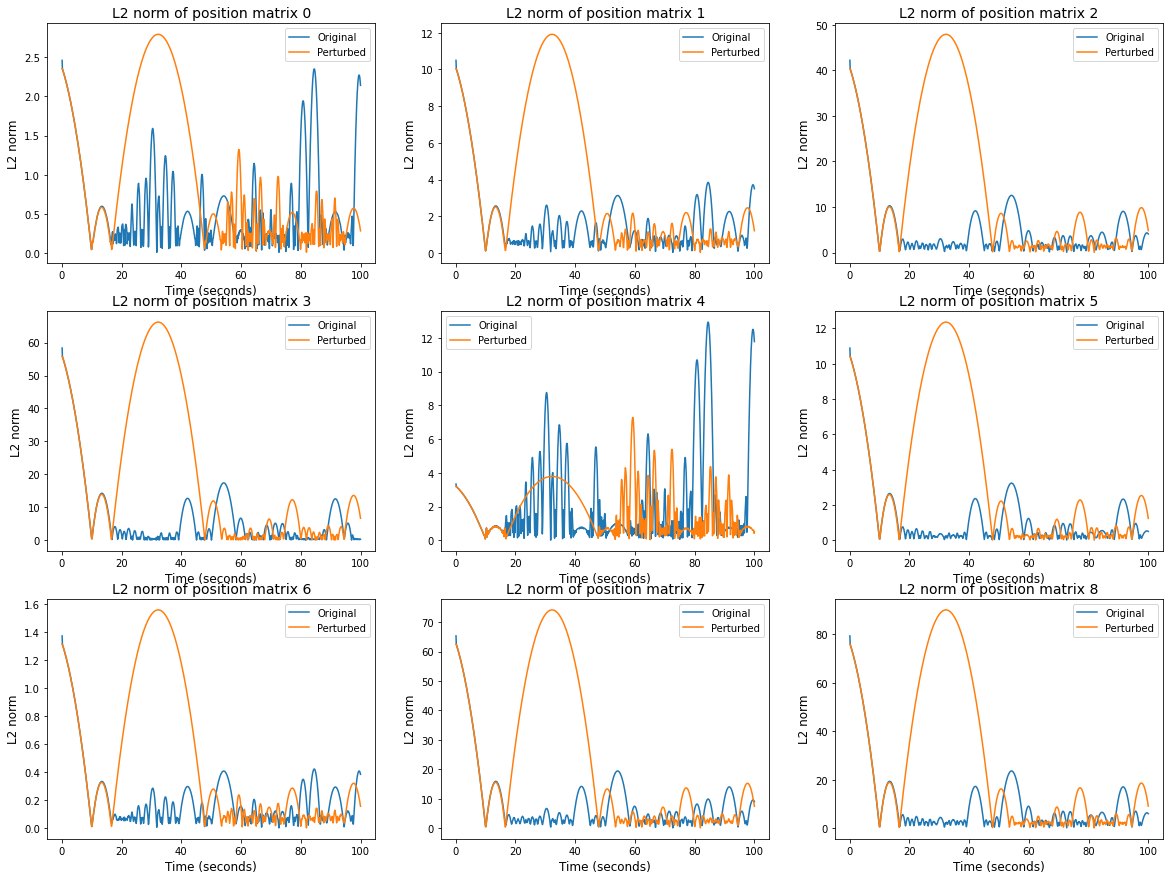

In [111]:

delta_t = 1*10**-4
record_steps = 1000
time_simulated = 100
simulation_repetitions = time_simulated/delta_t

times = np.arange(1*delta_t*record_steps, simulation_repetitions*delta_t + delta_t*record_steps , delta_t*record_steps)

plt.figure(figsize = (20,15))
for j in range(9):
    plt.subplot(3,3,j+1)
    
    X1_distance = []
    X2_perturbed_distance = []
    X4_perturbed_distance = []
    X6_perturbed_distance = []

    for i in range(len(X1_DF["X1"])-1):
        X1_distance.append(norm(X1_DF.iloc[i,j]))
        #X2_perturbed_distance.append(norm(X2_DF.iloc[i,j]))
        X4_perturbed_distance.append(norm(X2_DF.iloc[i,j]))
        #X6_perturbed_distance.append(norm(X6_DF.iloc[i,j]))

    
    plt.plot(times, X1_distance, label = "Original")
    #plt.plot(times,X2_perturbed_distance, label = "1st Perturbed")
    plt.plot(times,X4_perturbed_distance, label = "Perturbed")
    #plt.plot(times,X6_perturbed_distance, label = "3rd perturbed")
    plt.legend()
    plt.title(f"L2 norm of position matrix {j}", fontsize = 14)
    plt.ylabel("L2 norm", fontsize = 12)
    plt.xlabel("Time (seconds)", fontsize = 12)


Velocity norms of X_simulation_2

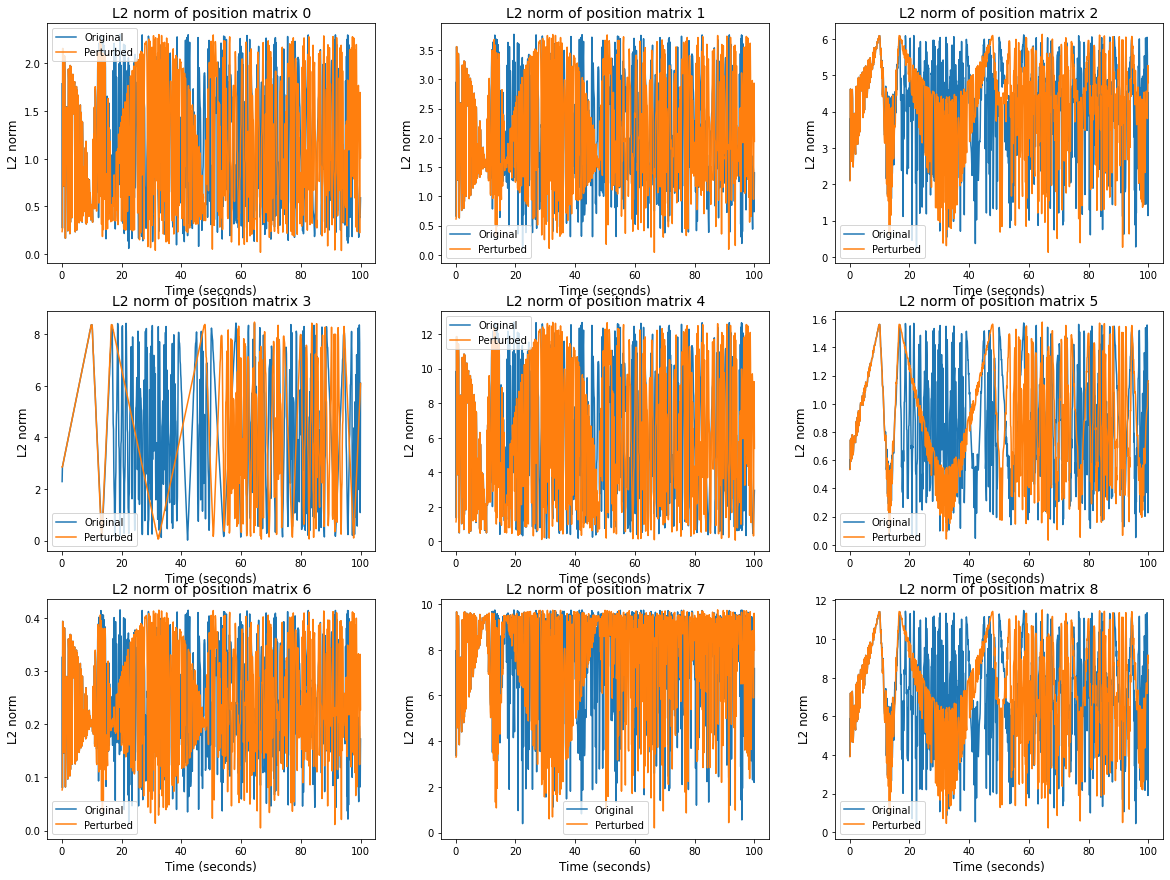

In [150]:
delta_t = 1*10**-4
record_steps = 1000
time_simulated = 100
simulation_repetitions = time_simulated/delta_t

times = np.arange(1*delta_t*record_steps, simulation_repetitions*delta_t + delta_t*record_steps , delta_t*record_steps)

plt.figure(figsize = (20,15))
for j in range(9):
    plt.subplot(3,3,j+1)
    
    X1_distance = []
    X2_perturbed_distance = []
    X4_perturbed_distance = []
    X6_perturbed_distance = []

    for i in range(len(X1_DF["X1"])-1):
        X1_distance.append(norm(V1_DF.iloc[i,j]))
        #X2_perturbed_distance.append(norm(X2_DF.iloc[i,j]))
        X4_perturbed_distance.append(norm(V2_DF.iloc[i,j]))
        #X6_perturbed_distance.append(norm(X6_DF.iloc[i,j]))

    
    plt.plot(times, X1_distance, label = "Original")
    #plt.plot(times,X2_perturbed_distance, label = "1st Perturbed")
    plt.plot(times,X4_perturbed_distance, label = "Perturbed")
    #plt.plot(times,X6_perturbed_distance, label = "3rd perturbed")
    plt.legend()
    plt.title(f"L2 norm of position matrix {j}", fontsize = 14)
    plt.ylabel("L2 norm", fontsize = 12)
    plt.xlabel("Time (seconds)", fontsize = 12)


Position norms of X_simulation_3.txt pickle file

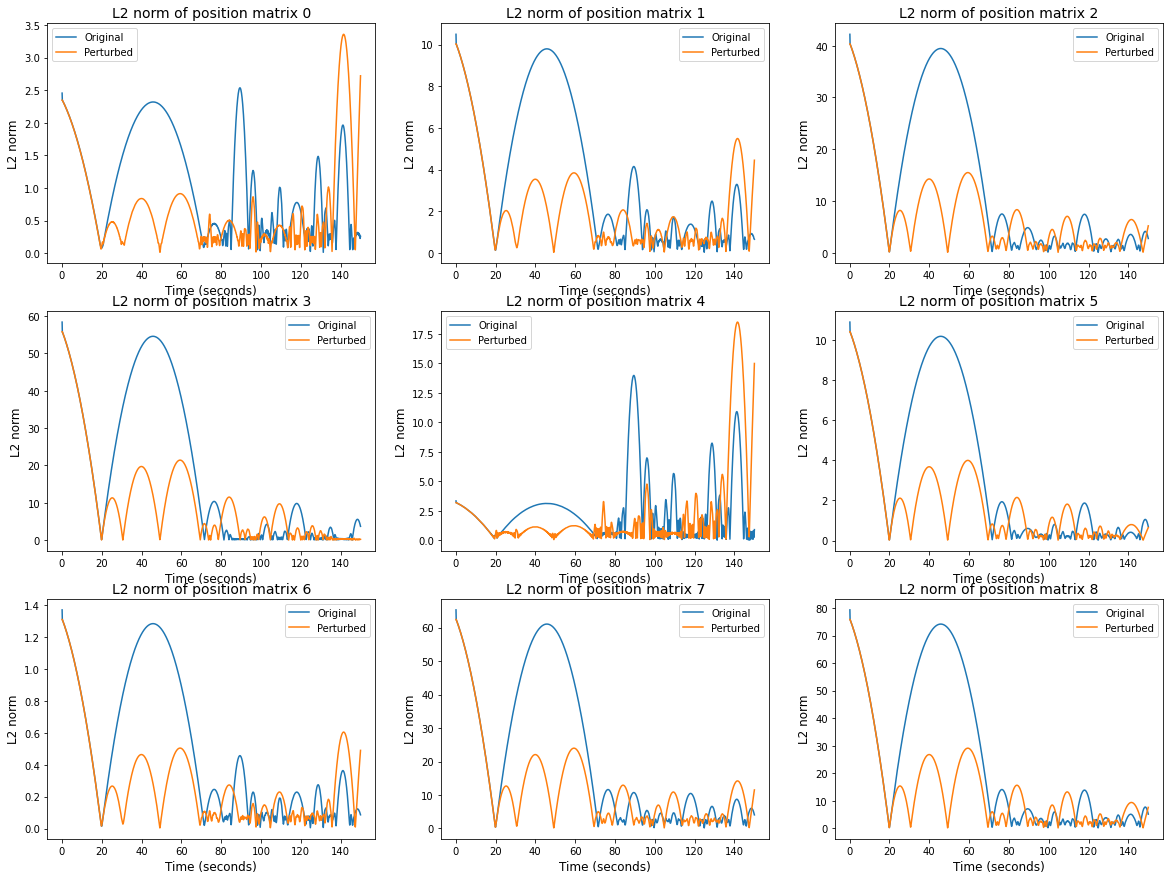

In [142]:
delta_t = 1*10**-4
record_steps = 1000
time_simulated = 150
simulation_repetitions = time_simulated/delta_t

times = np.arange(1*delta_t*record_steps, simulation_repetitions*delta_t + delta_t*record_steps , delta_t*record_steps)

plt.figure(figsize = (20,15))
for j in range(9):
    plt.subplot(3,3,j+1)
    
    X1_distance = []
    X2_perturbed_distance = []
    X4_perturbed_distance = []
    X6_perturbed_distance = []

    for i in range(len(X3_DF["X1"])-1):
        X1_distance.append(norm(X3_DF.iloc[i,j]))
        #X2_perturbed_distance.append(norm(X2_DF.iloc[i,j]))
        X4_perturbed_distance.append(norm(X4_DF.iloc[i,j]))
        #X6_perturbed_distance.append(norm(X6_DF.iloc[i,j]))

    
    plt.plot(times, X1_distance, label = "Original")
    #plt.plot(times,X2_perturbed_distance, label = "1st Perturbed")
    plt.plot(times,X4_perturbed_distance, label = "Perturbed")
    #plt.plot(times,X6_perturbed_distance, label = "3rd perturbed")
    plt.legend()
    plt.title(f"L2 norm of position matrix {j}", fontsize = 14)
    plt.ylabel("L2 norm", fontsize = 12)
    plt.xlabel("Time (seconds)", fontsize = 12)


Velocity norms of V_simulation_9

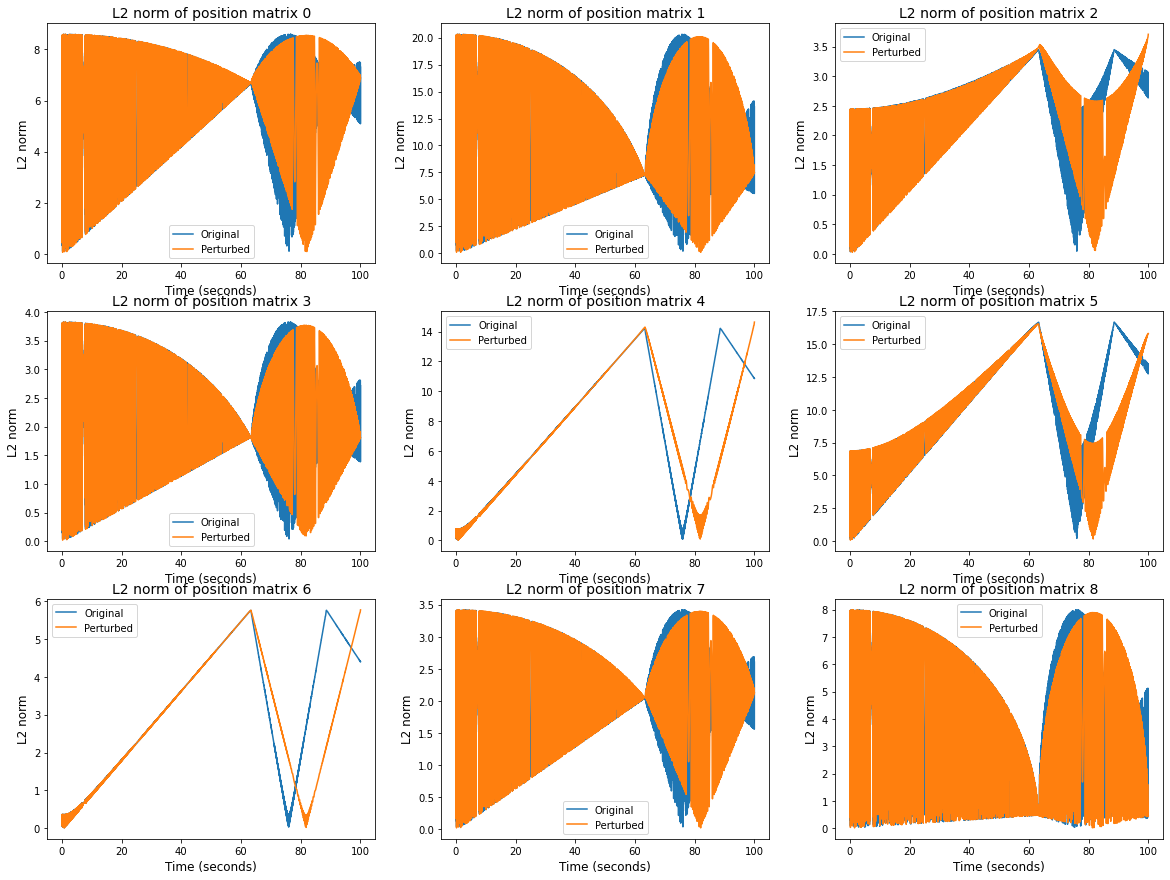

In [123]:
delta_t = 1*10**-5
record_steps = 1000
time_simulated = 100
simulation_repetitions = time_simulated/delta_t

times = np.arange(2*delta_t*record_steps, simulation_repetitions*delta_t + delta_t*record_steps , delta_t*record_steps)

plt.figure(figsize = (20,15))
for j in range(9):
    plt.subplot(3,3,j+1)
    
    X1_distance = []
    X2_perturbed_distance = []
    X4_perturbed_distance = []
    X6_perturbed_distance = []

    for i in range(len(V9_DF["V1"])-1):
        X1_distance.append(norm(V9_DF.iloc[i,j]))
        #X2_perturbed_distance.append(norm(X2_DF.iloc[i,j]))
        X4_perturbed_distance.append(norm(V10_DF.iloc[i,j]))
        #X6_perturbed_distance.append(norm(X6_DF.iloc[i,j]))

    
    plt.plot(times, X1_distance, label = "Original")
    #plt.plot(times,X2_perturbed_distance, label = "1st Perturbed")
    plt.plot(times,X4_perturbed_distance, label = "Perturbed")
    #plt.plot(times,X6_perturbed_distance, label = "3rd perturbed")
    plt.legend()
    plt.title(f"L2 norm of position matrix {j}", fontsize = 14)
    plt.ylabel("L2 norm", fontsize = 12)
    plt.xlabel("Time (seconds)", fontsize = 12)


**Using paper's separation formula**

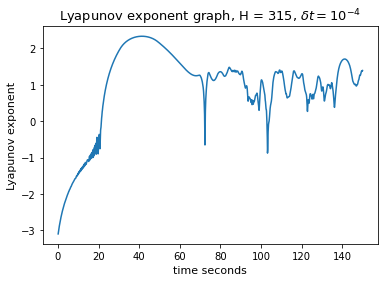

In [149]:
X1_distance = []
for i in range(len(X3_DF["X1"])-1):
    sumX = 0
    for j in range(9):
        deltaX = np.array(X3_DF.iloc[i+1,j])-np.array(X4_DF.iloc[i+1,j])

        argument = np.trace( deltaX**2 )

        sumX += argument
    X1_distance.append(np.sqrt(sumX))
plt.plot(times, np.log(np.sqrt(X1_distance)))
plt.title("Lyapunov exponent graph, H = 315, $\delta t = 10^{-4}$", fontsize = 13)
plt.xlabel("time seconds",fontsize = 11)
plt.ylabel("Lyapunov exponent",fontsize = 11)
plt.savefig("1e-4 perturbation", dpi=100)


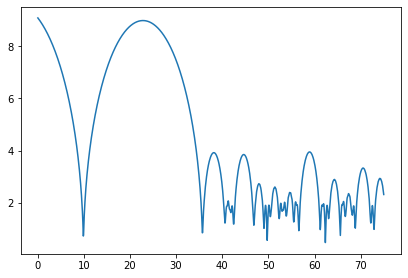

In [141]:
delta_t = 5*10**-5
record_steps = 1000
time_simulated = 75
simulation_repetitions = time_simulated/delta_t

times = np.arange(1*delta_t*record_steps, simulation_repetitions*delta_t + delta_t*record_steps , delta_t*record_steps)


plt.figure(figsize = (15,10))
X1_distance = []
for i in range(len(X3_DF["X1"])-1):
    sumX = 0
    for j in range(9):
        deltaX = np.array(X3_DF.iloc[i+1,j])
        argument = np.trace( deltaX**2 )

        sumX += argument
    X1_distance.append(np.sqrt(sumX))
plt.subplot(2,2,1)
plt.plot(times, (np.sqrt(X1_distance)))
